In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline 

**Steps** :
    
    1) Find and clean data, get in correct format
    2) Declare placeholders, i.e. inlets through 
       which data will be fed to the model when
       actually launched
    3) Develop the model using tf primitives to          get model output
    4) Using model output aka prediction, decide 
       on a cost function (usually model                  prediction compared against output label          placeholder)
    5) Optimize cost function (called train_op)
    6) Start session and execute the optimization
        

In [3]:
trX = np.linspace(-1,1,101)

noise = np.random.randn(*trX.shape)*0.33
#  * collects all the positional arguments in a tuple
#  ** collects all the keyword arguments in a dictionary
#  

trY = 2*trX + noise

In [4]:
# lis=[1, 2, 3, 4]
# dic={'a': 10, 'b':20}
# functionA(*lis, **dic)  #it is similar to functionA(1, 2, 3, 4, a=10, b=20)

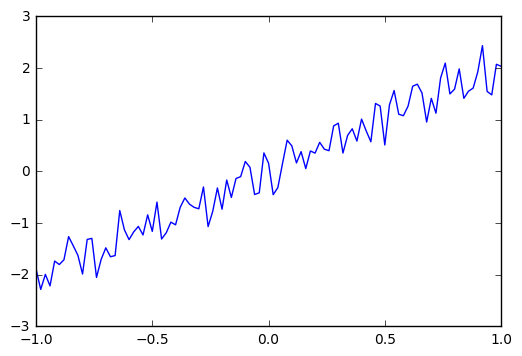

In [5]:
plt.plot(trX, trY)

In [6]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

w = tf.Variable(0.0, name='weights')
#Just 1 wt i.e. coefficient, init to 0

def model(X,w):
    #Model we propose is to simply return X*W
    return(tf.mul(X,w))

y_model = model(X,w)

cost = tf.square(Y - y_model)

train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost)          

In [8]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for i in range(100): #100 iters
        for(x,y) in zip(trX, trY): #for all training data
            sess.run(train_op, feed_dict={X:x, Y:y})
            
    print(sess.run(w))

2.05571
